In [1]:
import lecroy
import rigol
import numpy as np
from matplotlib import pyplot as plt
from sigproc_kit import *

LECROY,WR620ZI,LCRY2805N57162,8.5.1
Rigol Technologies,DG4202,DG4E212801262,00.01.14


In [2]:
##################################################
##              program RIGOL AWG               ##
##################################################


awg_samples = 2**12

awg_period = 250e-9

awg_time = np.linspace(0,awg_period,awg_samples)

test_amp = -500e-3


y2 = 0 + test_amp*(awg_time>100e-9)*(awg_time<150e-9)

rigol.set_waveform(2,awg_time,y2)

In [3]:
##################################################
##             program LeCroy Scope             ##
##################################################


lecroy.clear_all()
lecroy.set_tdiv(100e-9)

# access scope sources by labels
s = {
    "RIGOL_AWG_CH2"    :"C1", # set to 50R DC
    "PASTTREC_LVDS"    :"C4", # use LeCroy ZD1500 differential probe
    "PASTTREC_analog"  :"C3"  # set to 50R DC
}

# set vertical amplifications and offsets
lecroy.set_vdiv(              s["PASTTREC_LVDS"],200e-3)

lecroy.set_vdiv(              s["RIGOL_AWG_CH2"],200e-3)

lecroy.set_vdiv(              s["PASTTREC_analog"],100e-3 )
lecroy.set_voffset(           s["PASTTREC_analog"],-1000e-3 )


# access scope measurements by labels
m = {
    "PASTTREC_t1"  : "p3",
    "PASTTREC_tot" : "p4"
}

# TDC measurements for differential probe at 100R terminated PASTTREC LVDS output
lecroy.setup_measurement(m["PASTTREC_t1"] ,s["PASTTREC_LVDS"],"delay")
lecroy.setup_measurement(m["PASTTREC_tot"],s["PASTTREC_LVDS"],"widthn")


# access scope trigger channels by labels

t = {
    "RIGOL_AWG_SYNC1" : "D9",
    "RIGOL_AWG_SYNC2" : "D10"
}







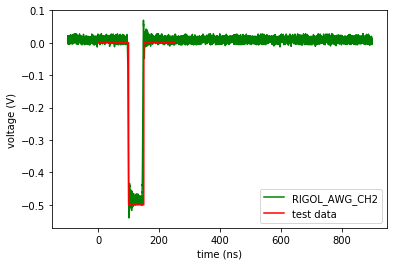

In [6]:
##################################################
##             measure AWG Waveform             ##
##################################################

lecroy.set_trig_source(t["RIGOL_AWG_SYNC2"])

time, wfm = lecroy.capture_waveforms([
    s["RIGOL_AWG_CH2"]
])

time_ns = time*1e9


plt.plot(time_ns,wfm[s["RIGOL_AWG_CH2"]] ,"g" ,label="RIGOL_AWG_CH2")
plt.plot(1e9*awg_time, y2 ,"r" ,label="test data")

plt.legend()
plt.xlabel("time (ns)")
plt.ylabel("voltage (V)")
plt.show()